## Basics of Probability
* Probability-Related **Concepts**
* How to **Assign** Probabilities to Experimental Outcomes
* Probability **Rules**

## Basics of Probability
* **Discrete** Random Variables
* **Continuous** Random Variables
* Probability **Distribution & Functions**

## Probability Processes
* Deterministic Processes are those that create a pattern with complete certainty in the outcome.
* Probabilistic processes concern situations that cannot be determined with complete certainty.

## Probabilistic processes
* Random processes
    * All probability equal
* Stochastic processes
    * Not all outcomes have an equal probability
    * Monte Carlo Simulation

## Concepts
* **An event** – Any phenomenon you can observe that can have **more than one outcome** (e.g., flipping a coin)
* **An outcome** – Any **unique condition** that can be the result of an event (e.g., flipping a coin: heads or tails), a.k.a simple event or sample points
* **Sample space** – The set of **all** possible outcomes associated with an event
* **Probability** is a measure of the **likelihood** of each possible outcome

## Relative Frequency 
$$ P(A) =  \dfrac{F(A)}{F(E)}  $$
P(A) = probability of outcome A occuring  
F(A) = absolute frequency of outcome A  
F(E) = absolute frequency of all outcomes for event E

<img src="../figures/book/McGrew-et-al_3E---Figure-5-1.jpg" alt="Figure 5.1" width="300"/>

$$ P(W) = \dfrac{number\ of\ wet\ days}{total\ days} = \dfrac{38}{100} = 0.38 $$
<br>
$$ P(W) = \dfrac{number\ of\ dry\ days}{total\ days} = \dfrac{62}{100} = 0.62 $$
<br>
$$ 0.0 \leq P(A) \leq 1.0 $$

### Complement
$$ P(A) + P(\overline{A}) = 1.0 $$
$$ P(\overline{W}) = P(D) $$

### Statistically Independent
* Exists when the probability of one event occurring is not influenced or affected by whether another event has occurred.
* Multiplication Rule:
$$ P(A\ and\ B) = P(A) \cdot P(B) $$

### Example
* Probabilty of Wet Day (0.38) AND Probability of Pizza Delivery Late (0.1)
$$ P(A\ and\ B) = 0.38 \cdot 0.1 = 0.038 $$  
But are they really independent?

### Event Probabilities
* Mutually Exclusive
$$ P(A\ or\ B\ or\ C) = P(A) + P(B) + P(C) $$
* Not Mutually Exclusive 
$$ P(A\ or\ B) = P(A) + P(B) - P(A\ and\ B) $$
* Conditional Probability
$$ P(A\ |\ B) = \dfrac{P(A\ and\ B)}{P(B)} $$

In [2]:
# Read table 5.1
import pandas as pd
tb5p1 = pd.read_excel('../data/ClassData.xlsx', sheet_name="5.1") 
tb5p1

,Country,CA,NY,FL,TX,NJ,Totals
0,Mexico,50645,2437,3113,32811,2437,139120
1,China,18680,18859,1620,3280,2253,70863
2,India,15099,5116,2019,5777,8123,69162
3,Phillippines,24082,2361,2320,2525,2321,58173
4,Dominican Republic,172,26249,3900,275,8444,53870
5,Totals,208446,147999,107276,87750,56920,1042625


In [3]:
#Probability of that the selecting an immigrant that orginated in China, India or the Phillippines
ChinaP = tb5p1["Totals"][1] / tb5p1["Totals"][5]
IndiaP = tb5p1["Totals"][2] / tb5p1["Totals"][5]
PhP = tb5p1["Totals"][3] / tb5p1["Totals"][5]
ChinaORIndiaORPhP = ChinaP + IndiaP + PhP
ChinaP, IndiaP, PhP, ChinaORIndiaORPhP

(0.0679659513247812,
 0.06633449226711426,
 0.05579474883107541,
 0.19009519242297088)

In [4]:
#Select a immigrant that orginated from Mexico OR settled in CA
#Definitly not multually exclusive
MexicoP = tb5p1["Totals"][0] / tb5p1["Totals"][5]
CAP = tb5p1["CA"][5] / tb5p1["Totals"][5]
MexicoANDCA_P = tb5p1["CA"][0] / tb5p1["Totals"][5]
FromMexicoORToCA_P = MexicoP + CAP - MexicoANDCA_P
MexicoP, CAP, MexicoANDCA_P, FromMexicoORToCA_P

(0.13343244215321903,
 0.19992422970866802,
 0.04857451144946649,
 0.28478216041242055)

In [5]:
#What is the probability of selecting a Dominican immigrant knowing he settled in NY
NY_AND_DomP = tb5p1["NY"][4] / tb5p1["Totals"][5]
NY_P = tb5p1["NY"][5] / tb5p1["Totals"][5]
Dom_in_NY_P = NY_AND_DomP / NY_P
NY_AND_DomP, NY_P, Dom_in_NY_P

(0.0251758781920633, 0.1419484474283659, 0.17735930648180054)

### Probability Distributions
* The usual application of **probability distributions** is to find a **theoretical distribution** 
* Reflects a process that **explains what we see** in some observed sample of a geographic phenomenon
* Compare the **form** of the sampled information and theoretical distribution through a **test of significance**
* Geography: **discrete random events** in space and time (e.g. how often will a tornado occur?)

### Discrete probability distributions (happens or doesn't)
* The **Uniform** Distribution (Not really referenced in the book)
* The **Binomial** Distribution
* The **Geometric** Distribution
* The **Poisson** Distribution
* Each is appropriately applied in certain situations and to particular phenomena

### The Binomial Distribution
* is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p.
* Used to answer questions of how likely is a particular event to occur over repeated time periods
    * Flooding
    * Crop Failure

<img src="../figures/book/McGrew-et-al_3E---Figure-5-2.jpg" alt="Figure 5.2" width="300"/>

### Binomial Function 
$$ P(X) = \dfrac{n!p^{x}q^{n-X}}{X!(n-X)!} $$
$n$ = number of events or trials  
$p$ = probability of the given outcome in a single trial  
$q = \overline{p} = 1 - p$ or the probability of the other outcome in a single trial  
$X$ = number of times the given outcome occurs within $n$ trials  
$n!$ = $n$ **factorial**  

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import binom

# Binomial distribution in python 

#Setup n (number of trials) and p (probability of event happening in any given year)
n, p = 5, 0.16

#create an array of all success values we want to check, in this case all of them
x = np.array(range(0,n+1))
print(x)
a = binom.pmf(x, n, p)
#convert it into a pandas Data frame
bData = pd.DataFrame(a, columns=["Prob"]).reset_index().rename(columns={"index": "Successes"})
bData["Type of Outcome"] = np.where((bData["Successes"] < 2), "Suitable", "Unsuitable")
bData

[0 1 2 3 4 5]


,Successes,Prob,Type of Outcome
0,0,0.418212,Suitable
1,1,0.398297,Suitable
2,2,0.151732,Unsuitable
3,3,0.028901,Unsuitable
4,4,0.002753,Unsuitable
5,5,0.000105,Unsuitable


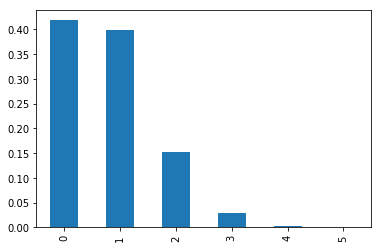

In [7]:
plt = bData["Prob"].plot.bar()
plt

In [8]:
# What is the probability of less than 2 successes?
# i.e. P(0) + P(1) + P(2)
bData["Prob"][0] + bData["Prob"][1]

0.8165090303999998

In [9]:
bData[["Type of Outcome", "Prob"]].groupby("Type of Outcome").agg(["sum"])

,Prob
,sum
Type of Outcome,
Suitable,0.816509
Unsuitable,0.183491


In [10]:
#Setup n (number of trials) and p (probability of event happening in any given year)
n, p = 5, 0.75

#create an array of all success values we want to check, in this case all of them
x = np.array(range(0,n+1))
print(x)
a = binom.pmf(x, n, p)
#convert it into a pandas Data frame
bData = pd.DataFrame(a, columns=["Prob"]).reset_index().rename(columns={"index": "Successes"})
bData

[0 1 2 3 4 5]


,Successes,Prob
0,0,0.000977
1,1,0.014648
2,2,0.087891
3,3,0.263672
4,4,0.395508
5,5,0.237305


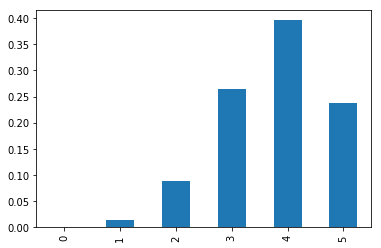

In [11]:
plt = bData["Prob"].plot.bar()
plt

In [12]:
# In this case, what is the probability of less than 2 successes?
# i.e. P(0) + P(1) + P(2)
bData["Prob"][0] + bData["Prob"][1]

0.015624999999999993

In [13]:
# You can also simulate actually living through a certain number of trials in Python
n, p = 5, 0.16
trials = np.random.binomial(n, p, 10)
trials, (trials == 1).sum() / 10

(array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1]), 0.5)

### Geometric Distribution
* The geometric distribution is focused on the exact number of consecutive trials necessary to observe an event or outcome.
* If I lived in an area for x years what is the likelihood that I would live through a hurricane?
* $$ (1-p)^{k-1}p $$


<table>
<tr>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-5-5.jpg" alt="Figure 5.5" width="350"/>
    </td>
<td>
<img src="../figures/book/McGrew-et-al_3E---Figure-5-6.jpg" alt="Figure 5.6" width="350"/>
    </td>    
</tr>
</table>

In [10]:
from scipy.stats import geom
import numpy as np
import pandas as pd
#Setup n (number of trials) and p (probability of event happening in any given year)
p = 0.14

#create an array of all success values we want to check, in this case all of them
k = np.array(range(1,20+1))
a = geom.pmf(k, p)

#convert it into a pandas Data frame
#Prob column represents the probability that the event will occur in that trail (flooding occur that year)
gData = pd.DataFrame(a, columns=["Prob"]).reset_index().rename(columns={"index": "Number of Trials"})
gData["Number of Trials"] += 1
#Cululative Prob is represents the probability that the event will occur in that trail or any previous trial 
# (flooding in that year or sooner)
# Remember Adding is the way to 
gData['Cumulative_Prob'] = gData['Prob'].cumsum()
gData

,Number of Trials,Prob,Cumulative_Prob
0,1,0.140000,0.140000
1,2,0.120400,0.260400
2,3,0.103544,0.363944
3,4,0.089048,0.452992
4,5,0.076581,0.529573
5,6,0.065860,0.595433
6,7,0.056639,0.652072
7,8,0.048710,0.700782
8,9,0.041891,0.742673
9,10,0.036026,0.778698


### Poisson Distribution
* Can be used to analyze how frequently an outcome occurs during a certain time period or across a particular area.
* You must know the mean frequency as input. (How often it occurs on average in one trial)

$$ P(X) = \dfrac{e^{-\lambda}(\lambda^{X})}{X!} = \dfrac{\lambda^{X}}{e^{\lambda}(X!)} $$
Where:  
X = Frequency of occurrence  
$\lambda$ = Mean frequency of occurrence  
e = base of the natural logarithm (approx. 2.71828)  


<img src="../figures/book/McGrew-et-al_3E---Figure-5-7.jpg" alt="Figure 5.7" width="300"/>



### Poisson distribution
The shape of the distribution depends strongly upon the value of λ, because as λ increases, the distribution becomes less skewed, eventually approaching a normal-shaped distribution as it gets quite large.

In [15]:
from scipy.stats import poisson

lam = 2.59 #average frequency of occurance
x = np.array(range(0,20)) #test range from 0 - 10

a = poisson.pmf(x,lam)

#convert it into a pandas Data frame
pData = pd.DataFrame(a, columns=["Prob"]).reset_index().rename(columns={"index": "Freq"})
pData


,Freq,Prob
0,0,7.502004e-02
1,1,1.943019e-01
2,2,2.516210e-01
3,3,2.172328e-01
4,4,1.406582e-01
5,5,7.286096e-02
6,6,3.145165e-02
7,7,1.163711e-02
8,8,3.767514e-03
9,9,1.084207e-03


### Poisson Uses and Assumptions:
* It is used to count the number of occurrences of an event within a given unit of time, area, volume, etc. (therefore a discrete distribution)
* The mean or expected number of events per unit (λ) is found by past experience (observations)

### Poisson Uses and Assumptions
* The probability that an event will occur within a given unit must be the same for all units (i.e. the underlying process governing the phenomenon must be invariant)
* The number of events occurring per unit must be independent of the number of events occurring in other units (no interactions)




### Poisson Applications:
* The Poisson distribution is sometimes known as the Law of Small Numbers, because it describes the behavior of events that are rare
* We can observe the frequency of some rare phenomenon, find its mean occurrence, and then construct a Poisson distribution and compare our observed values to those from the distribution (effectively expected values) to see the degree to which our observed phenomenon is obeying the Law of Small Numbers.

### Geographic Example
* Is this set of very large wildfires across New Mexico randomly distributed?
* We can use the Poisson Distribution to find out!
<img src="../figures/book/McGrew-et-al_3E---Figure-5-10.jpg" alt="Figure 5.10" width="300"/>